In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv('fifa19.csv', encoding='utf-8')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


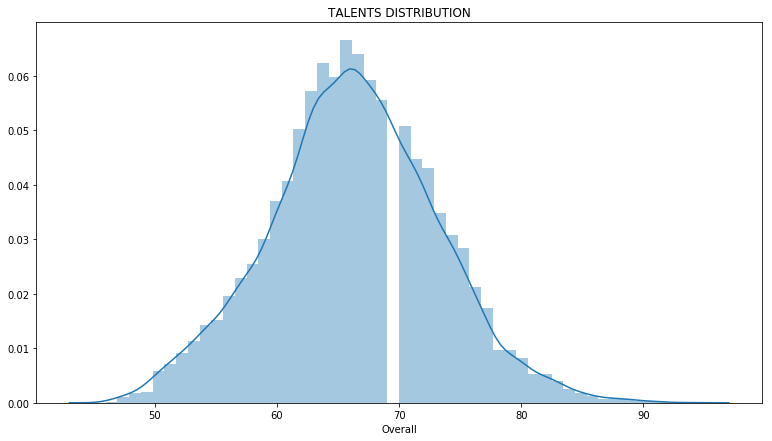

In [3]:
plt.figure(figsize=(13,7))
plt.title("TALENTS DISTRIBUTION")
sns.distplot(df['Overall'])

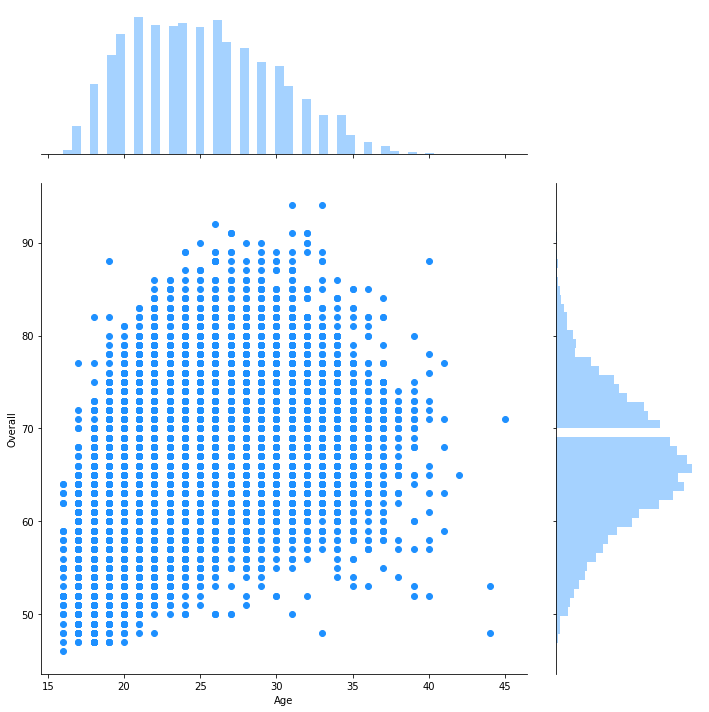

In [4]:
sns.jointplot(x="Age", y="Overall", data=df, ratio=3, color='dodgerblue', height=10)

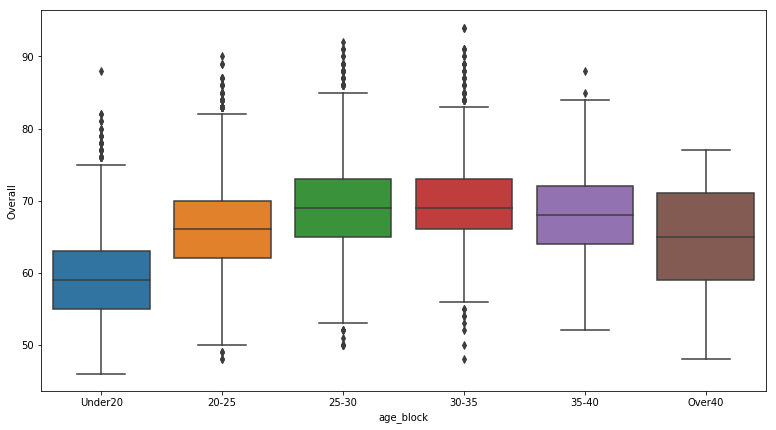

In [5]:
ages = df.copy()
ages['age_block'] = pd.cut(ages['Age'], [15, 20, 25, 30, 35, 40, 60], labels=['Under20', '20-25', '25-30', '30-35', '35-40', 'Over40'])

plt.figure(figsize=(13,7))
sns.boxplot(x="age_block", y='Overall', data=ages)
plt.show()

In [6]:
df.keys()

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

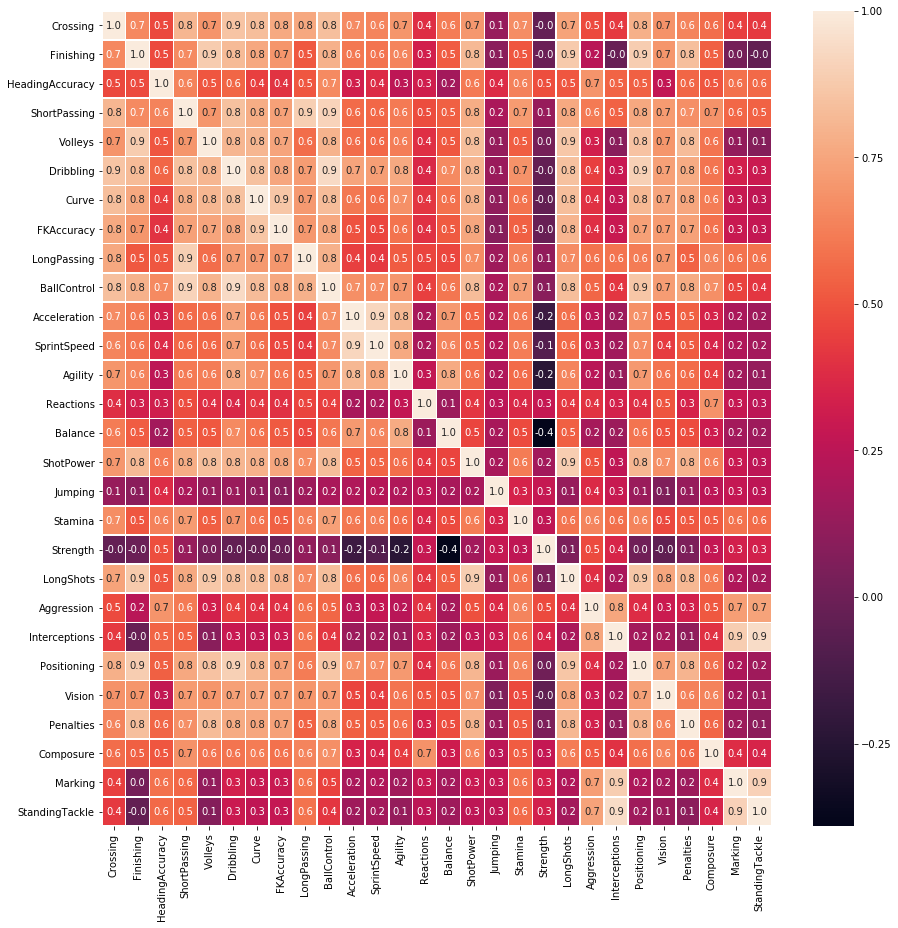

In [7]:
stats = df[['Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle']]

f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(stats.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

### CONTINUED IN KAGGLE

In [8]:
stats.corr().sum()

Crossing           17.382266
Finishing          15.417763
HeadingAccuracy    13.995783
ShortPassing       18.392074
Volleys            16.139328
Dribbling          18.228367
Curve              17.171017
FKAccuracy         16.098214
LongPassing        16.595461
BallControl        18.944259
Acceleration       13.907477
SprintSpeed        13.790336
Agility            14.475912
Reactions          10.766552
Balance            12.280614
ShotPower          17.216134
Jumping             6.472061
Stamina            16.234801
Strength            3.694191
LongShots          17.172425
Aggression         13.214821
Interceptions      10.536448
Positioning        17.257294
Vision             14.891558
Penalties          15.556938
Composure          14.868376
Marking            10.879047
StandingTackle     10.239651
dtype: float64

In [9]:
stats.corr().sum().sort_values(ascending=False)[:5]

BallControl     18.944259
ShortPassing    18.392074
Dribbling       18.228367
Crossing        17.382266
Positioning     17.257294
dtype: float64

In [10]:
stats.corr().sum().sort_values(ascending=False)[-5:]

Reactions         10.766552
Interceptions     10.536448
StandingTackle    10.239651
Jumping            6.472061
Strength           3.694191
dtype: float64